<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/1%EC%A3%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 퍼셉트론

In [14]:
import tensorflow as tf

In [30]:
# 퍼셉트론 구현
class Perceptron:
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([3, 1]))

    def train(self, X):
        err = 1
        epoch, max_epochs = 0, 20
        while err > 0.0 and epoch < max_epochs:
            epoch += 1
            self.optimize(X)
            err = self.mse(Y, self.pred(X)).numpy()
            print('epoch : ', epoch, 'mse : ', err)
        
    def pred(self, X):
        return self.step(tf.matmul(X, self.W))
    
    def mse(self, Y, y_hat):
        return tf.reduce_mean(tf.square(tf.subtract(Y, y_hat)))

    def step(self, x):
        return tf.dtypes.cast(tf.math.greater(x, 0), tf.float32)
    
    def optimize(self, X):
        delta = tf.matmul(X, tf.subtract(Y, self.step(tf.matmul(X, self.W))), transpose_a = True)
        self.W.assign(self.W + delta)

## AND gate

In [27]:
# 데이터 생성
T = 1.0
F = 0.0
bias = 1.0

def get_AND_data():
    X = [
         [F, F, bias],
         [F, T, bias],
         [T, F, bias],
         [T, T, bias]
    ]
    Y = [ [F], [F], [F], [T] ]
    return X, Y

In [28]:
X, Y = get_AND_data()

In [31]:
# 학습
perceptron = Perceptron()
perceptron.train(X)

epoch :  1 mse :  0.25
epoch :  2 mse :  0.25
epoch :  3 mse :  0.5
epoch :  4 mse :  0.25
epoch :  5 mse :  0.0


In [32]:
# 테스트
print(perceptron.pred(X).numpy())

[[0.]
 [0.]
 [0.]
 [1.]]


## NAND Gate 구현

In [4]:
def NAND(a,b):
    input = np.array([a, b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [5]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


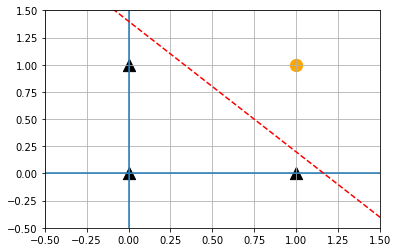

In [6]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
bias = 0.7
y = (0.6*x1 - bias)/-0.5

plt.axvline(x=0)
plt.axhline(y = 0)


plt.plot(x1, y, 'r--')

plt.scatter(0, 0, color = 'black', marker = '^', s = 150)
plt.scatter(0, 1, color = 'black', marker = '^', s = 150)
plt.scatter(1, 0, color = 'black', marker = '^', s = 150)
plt.scatter(1, 1, color = 'orange', marker = 'o', s = 150)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

# 다층 퍼셉트론

## XOR 구현

In [ ]:
def NAND(a,b):
    input = np.array([a, b])
    weights = np.array([-0.6, -0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [33]:
def AND(a,b):
    input = np.array([a, b])
    weights = np.array([0.4, 0.4])
    bias = -0.6
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [35]:
def OR(a,b):
    input = np.array([a, b])
    weights = np.array([0.4, 0.5])
    bias = -0.3
    value = np.sum(input*weights) + bias

    # 계단 함수가 활성화 함수
    if value <= 0:
        return 0
    else:
        return 1

In [34]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [36]:
# 활성화 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [38]:
# 입력 데이터
X = np.array([1.0, 0.5, 0.4])

W1 = np.array([ [0.1, 0.3, 0.5], [0.2, 0.4, 0.6], [0.3, 0.5, 0.7] ])
B1 = np.array([1, 1, 1])

print(W1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

# 활성화 함수 전
print(A1)
# 활성화 함수 적용 후
print(Z1)

(3, 3)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [39]:
W2 = np.array([[0.2, 0.4, 0.6], [0.1, 0.3, 0.5], [0.4, 0.6, 0.8]])
B2 = np.array([1 , 1, 1])

print(W2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

(3, 3)
[0.83173411 0.89116528 0.93133834]


In [41]:
# 3가지 입력을 받고 이후 뉴런 2개로 들어가야 하므로 3*2 행렬이 됩니다.
W3 = np.array([ [0.1, 0.3], [-0.1, -0.5], [0.3, 0.5] ])
B3 = np.array([1, 1])

print(W3.shape)

A3 = np.dot(Z1, W3) + B3
Z3 = sigmoid(A3)

print(Z3)

(3, 2)
[0.77920645 0.77876075]
